# Exercises

 For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?


##### Ho: The network latency has not gone up since we switched internet service providers.

##### Ha: The network latency has gone up since we switched internet service providers.

#### True neg: 
No change in latency. Correct inference. `P = 1-a`
#### True pos:
Latency has gone up. Correct inference. `P = 1 - b`

#### Type I error: 
Concluded that latency has gone up, when there is no change. `P=b`

#### Type II error:
Conclude there is no change in latency when there really is a change. `P=b`


# Is the website redesign any good?

##### Ho: The website redesign is not effective in grabbing customers' attention.

##### Ha: The website redesign effectively captures customers' attention.

#### True neg: 
No change in customer attention. Correct inference. `P = 1-a`

#### True pos:
Customer attention has gone up. Correct inference. `P = 1 - b`

#### Type I error: 
Concluded that customer attention has gone up, when there is no change. `P=b`

#### Type II error:
Conclude there is no change in customer attention when there really is a change. `P=b`

# Is our television ad driving more sales?


##### Ho: Our television ad does not reach enough people to drive more sales.

##### Ha: Our television ad reaches enough people to drive more sales.

#### True neg: 
No change in amount of people reached. Correct inference. `P = 1-a`

#### True pos:
Amount of people reached has gone up. Correct inference. `P = 1 - b`

#### Type I error: 
Concluded that the amount of people reached has gone up, when there is no change. `P=b`

#### Type II error:
Conclude there is no change in the amount of people reached when there really is a change. `P=b`

# T-Test

### Examples

In [11]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.study_strategy.fillna('None', inplace=True)

In [2]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,None,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exam_score', ylabel='Density'>

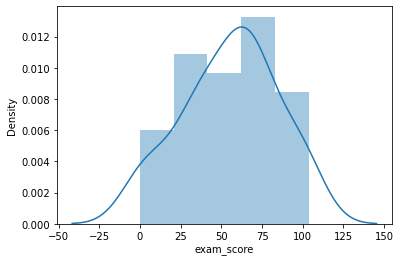

In [3]:
import seaborn as sns

sns.distplot(df.exam_score)

In [4]:
df.exam_score.mean(), df.exam_score.median()

(55.28336550715703, 58.35658448399582)

In [5]:
lefties = df[df.handedness == 'left']

μ = df.exam_score.mean()
xbar = lefties.exam_score.mean()
s = lefties.exam_score.std()
n = lefties.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

0.49180552940467903

# Exercises

## 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

###### What?
avg time to sell houses for two different offices

###### Ho: There is no difference in average time to sell at two offices

###### Ha: There is difference in average time to sell at two offices

Significance level alpha = 0.05

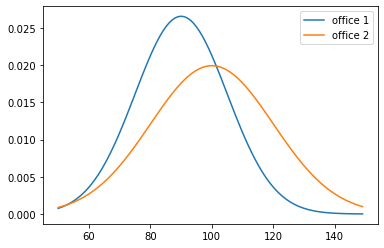

In [6]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')

plt.legend()

In [7]:
sample1 = 40
mean1 = 90
std1 = 15

sample2 = 50
mean2 = 100
std2 = 20

alpha = .05

In [8]:
(40 - 1)*(15**2) + (50 - 1)*(20**2)

28375

In [9]:
28375/((40+50) - 2)

322.4431818181818

In [10]:
sp = sqrt(322.4431818181818)
sp

17.956702977389302

In [11]:
(sqrt((1/40) + (1/50)))

0.21213203435596426

In [12]:
0.21213203435596426*sp

3.809191932919393

In [13]:
t = (mean2 - mean1)/3.809191932919393
t

2.6252287036468456

In [14]:
df = (sample1 + sample2) -2
df

88

In [15]:
p = stats.t(df).sf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


In [16]:
print(f'Because the p-value ({p}) is less than alpha value ({alpha}), we reject the null hypothesis')

Because the p-value (0.01020985244923939) is less than alpha value (0.05), we reject the null hypothesis


## 2. Load the mpg dataset and use it to answer the following questions:

- a.) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- b.) Are compact cars more fuel-efficient than the average car?
- c.) Do manual cars get better gas mileage than automatic cars?

In [17]:
def decision_p(p):
    if (p/2 < alpha) & (t > 0):
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

# a.

Ho: there is no difference in fuel-efficiency in cars from 2008 vs 1999

Ha: there is a difference in fuel-efficiency in cars from 2008 vs 1999

In [18]:
from pydataset import data
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [19]:
mpg['avg_mpg'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [20]:
cars_08 = mpg[mpg.year == 2008].avg_mpg
cars_99 = mpg[mpg.year == 1999].avg_mpg

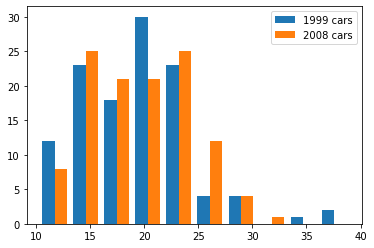

In [21]:
plt.hist([cars_99, cars_08], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [22]:
(cars_08.var(), cars_99.var())

(22.550836772260343, 25.850396545865912)

In [23]:
t, p = stats.ttest_ind(cars_2008, cars_1999)
t, p

NameError: name 'cars_2008' is not defined

In [ ]:
decision_p(p)

# b. 

Ho: there is no difference in fuel-efficiency in compact cars and average cars

Ha: there is a difference in fuel-efficiency in compact cars and average cars

In [24]:
compact = mpg[mpg['class'] == 'compact'].avg_mpg
average = mpg.avg_mpg

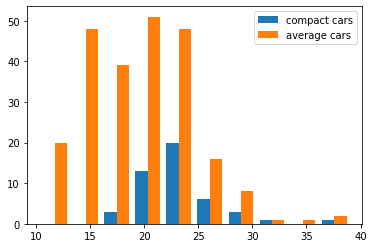

In [25]:
plt.hist([compact, average], label=["compact cars", "average cars"])
plt.legend(loc="upper right");

In [26]:
(compact.var(), average.var())

(12.763933193960233, 24.106173930122633)

In [27]:
t, p = stats.ttest_1samp(compact, average.mean())
t, p/2, alpha

(7.512360093161354, 7.808833174403864e-10, 0.05)

In [28]:
decision_p(p)

We reject the null hypothesis


# c.

Ho: there is no difference in fuel-efficiency for manual cars and automatic cars

Ha: there is a difference in fuel-efficiency for manual cars and automatic cars

In [29]:
manual = mpg[mpg['trans'].str.startswith('m')].avg_mpg
auto = mpg[mpg['trans'].str.startswith('a')].avg_mpg

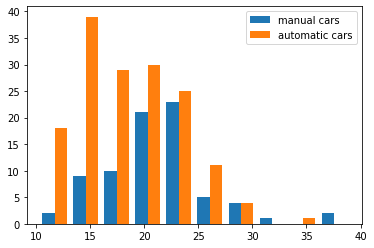

In [30]:
plt.hist([manual, auto], label=["manual cars", "automatic cars"])
plt.legend(loc="upper right");

In [31]:
(manual.var(), auto.var())

(25.665633639828275, 20.428279095002054)

In [32]:
t, p = stats.ttest_ind(manual, auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [33]:
decision_p(p)

We reject the null hypothesis


# Exercises

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [35]:
telco = pd.read_csv('telco_churn.csv')
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 1a.) Does tenure correlate with monthly charges?

In [36]:
n = telco.shape[0] 
degf = n - 2       
conf_interval = .95 
a = 1 - conf_interval

#### Hypothesis
Ho: There is no linear correlation between tenure and monthly charges.

Ha: There is a linear relationship between tenure and monthly charges.

In [37]:
x1 = telco.tenure
y1 = telco.MonthlyCharges

def stdev(x):
    variance = ((x1 - x1.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x1 - x1.mean()) * (y1 - y1.mean())).sum() / n) / (stdev(x1) * stdev(y1))
r_xy

0.30372459190581547

In [38]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

26.749377040544818

In [39]:
p = stats.t.sf(t, df=degf) * 2
p

3.292638043371735e-150

In [40]:
p < a

True

#### Decision
Since p is less than alpha, we reject our null hypothesis that there is no linear correlation between tenure and monthly charges.

# 1b.) Total charges?

In [41]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
telco.TotalCharges.astype('float64')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [46]:
n = telco.shape[0] 
degf = n - 2       
conf_interval = .95 
a = 1 - conf_interval

In [51]:
telco.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [52]:
x2 = telco.tenure
y2 = telco.TotalCharges
corr, p = stats.pearsonr(x2, y2)
corr, p

(0.8258804609332093, 0.0)

In [53]:
p < a

True

#### Decision
Since p is less than alpha, we reject our null hypothesis that there is no linear correlation between tenure and monthly charges.

# 1c.) What happens if you control for phone and internet service?

In [64]:
telco["telecom_setup"] = telco.InternetService + " " + telco.PhoneService
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,telecom_setup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,DSL Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,DSL Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,DSL No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Fiber optic Yes


In [74]:
def corr_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

In [68]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [71]:
telco.astype('object')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,telecom_setup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,DSL Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,DSL Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No,DSL No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes,Fiber optic Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No,DSL Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No,Fiber optic Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No,DSL No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes,Fiber optic Yes


In [65]:
options = telco.telecom_setup.value_counts().index

In [75]:
output = []

for option in options:
    subset = telco[telco.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure, subset.MonthlyCharges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber optic Yes,0.624621,0.000000e+00,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,DSL Yes,0.658094,5.781402e-216,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
2,No Yes,0.346188,4.896605e-44,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL No,0.592430,1.173274e-65,reject the null hypothesis that there is no linear correlation. Evidence supports a li...


### 2. Use the employees database.
   -  #### a. Is there a relationship between how long an employee has been with the company and their salary?
   -  #### b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [9]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

# 2a.

In [13]:
url = get_db_url("employees")
sql = """
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
"""

employees = pd.read_sql(sql, url)
employees

,days_on_job,salary
0,12916,88958
1,13133,72527
2,12853,43311
3,12758,74057
4,11742,94692
...,...,...
240119,10524,52868
240120,11362,69501
240121,12982,83441
240122,10250,55003


In [28]:
alpha = 0.05
corr, p = stats.pearsonr(employees.days_on_job, employees.salary)

if p < alpha:
    print("We reject the null hypothesis")
    print("Data supports the claim that there is a linear correlation")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Data supports the claim that there is a linear correlation


(0.30646256131860894, 0.0)

# 2b.

In [18]:
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""

df = pd.read_sql(sql, url)

In [20]:
corr, p = stats.pearsonr(df.days_on_job, df.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Data supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Data supports the claim that there is a linear correlation between tenure and number of titles


(0.2665989299136427, 0.0)

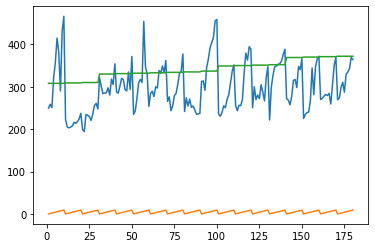

In [27]:
plt.plot(df);

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [22]:
from pydataset import data
df = data("sleepstudy")
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


### Hypothesis
Ho: There is no linear correlation between days and reaction time

Ha: There is a linear correlation between days and reaction time

In [23]:
corr, p = stats.pearsonr(df.Days, df.Reaction)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis


(0.5352302262650253, 9.894096322214812e-15)